In [5]:
import numpy as np
import pandas as pd

波士顿房价数据字段说明
* crim 房屋所在地的犯罪率
* ZN 面积大于20000平方英尺住宅所在地的比例
* indus 房屋所在地非零售区域所占比例
* chas 房屋是否位于河边，
* nox CO2的浓度
* rm 平均房间数量
* age 1940年前建筑房屋所占比例
* dis 房屋距离波士顿五大商业中心的加权距离
* rad 距离房屋最近的公路
* tax 财产税额度
* ptratio 房屋所在地师生比例
* BLACK 计算公式： 1000*(房屋所在镇非美籍人口所在比例 - 0.63)**2
* LSTAT 弱势群体人口所占比例
* MEDV 房间平均价格

In [18]:
data = pd.read_csv(r"dataset/boston.csv")
data
# 数据基本信息,是否有缺失值
data.info()
data.duplicated().any()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [27]:
class LinearRegression:
    ''' 使用线性回归，最小二乘法'''
    def fit(self, X, y):
        ''' 根据提供的训练数据，对模型进行训练
         parameters
        --------
        X: 类数组类型, shape：[样本数量，特征数量]
        待训练的样本特征
        y: 类数组类型，shape：样本数量
        每个样本的目标值（标签）
        '''
        # 如果X是切片后的对象，无法完成转化，故进行拷贝
        X = np.asmatrix(X.copy())
        # y是一维结构，无需拷贝
        # 一维转化为二维=>reshape
        y = np.asmatrix(y).reshape(-1,1)
        # 通过最小二乘公式计算权重值
        self.w = (X.T * X).I * X.T * y
    def predict(self, X):
        ''' 根据提供的数据，对模型进行预测
         parameters
        --------
        X: 类数组类型, shape：[样本数量，特征数量]
        待预测的样本特征
        returns
        ---------
        y: 类数组类型，shape：样本数量
        每个样本的目标值（标签）
        '''
        X = np.asmatrix(X.copy())
        result = X*self.w
        # 将矩阵转化为一维的array，扁平化处理
        return np.array(result).ravel()

In [30]:
# 不考虑截距
t = data.sample(len(data), random_state=0)
train_X = t.iloc[:400,:-1]
train_y = t.iloc[:400,-1]
test_X = t.iloc[400:,:-1]
test_y = t.iloc[400:,-1]
lr = LinearRegression()
lr.fit(train_X, train_y)
result = lr.predict(test_X)
#display(len(result))
#display(len(test_y))
# mse
display(np.mean((result-test_y)**2))
# 查看模型权重值
display(lr.w)

16.892575069960852

matrix([[-2.25548227e-03],
        [-9.36187378e-02],
        [ 4.57218914e-02],
        [ 3.67703558e-03],
        [ 2.43746753e+00],
        [-2.96521997e+00],
        [ 5.61875896e+00],
        [-4.94763610e-03],
        [-8.73950002e-01],
        [ 2.49282064e-01],
        [-1.14626177e-02],
        [-2.50045098e-01],
        [ 1.49996195e-02],
        [-4.56440342e-01]])

In [36]:
# 考虑截距x0
# 增加一列，该列的值全为1
t = data.sample(len(data), random_state=0)
new_column = t.columns.insert(0,"Intercapt")
# 增加1一列，值为空时设置为1
t = t.reindex(columns = new_column, fill_value=1)
train_X = t.iloc[:400,:-1]
train_y = t.iloc[:400,-1]
test_X = t.iloc[400:,:-1]
test_y = t.iloc[400:,-1]
lr = LinearRegression()
lr.fit(train_X, train_y)
result = lr.predict(test_X)
#display(len(result))
#display(len(test_y))
# mse
display(np.mean((result-test_y)**2))
# 查看模型权重值
display(lr.w)

17.101868160858718

matrix([[ 4.02498625e+01],
        [-2.74427257e-03],
        [-1.10979116e-01],
        [ 4.32293333e-02],
        [ 9.03681121e-03],
        [ 2.05744578e+00],
        [-1.91879749e+01],
        [ 3.31129080e+00],
        [ 3.60479588e-03],
        [-1.42037452e+00],
        [ 4.04808653e-01],
        [-1.49919227e-02],
        [-8.64215948e-01],
        [ 8.37948723e-03],
        [-5.67927413e-01]])

In [37]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["font.family"] = 'SimHei' # 默认mpl不支持中文，设置一下支持 
mpl.rcParams["axes.unicode_minus"] = False # 设置中文字体是可以正常显示负号

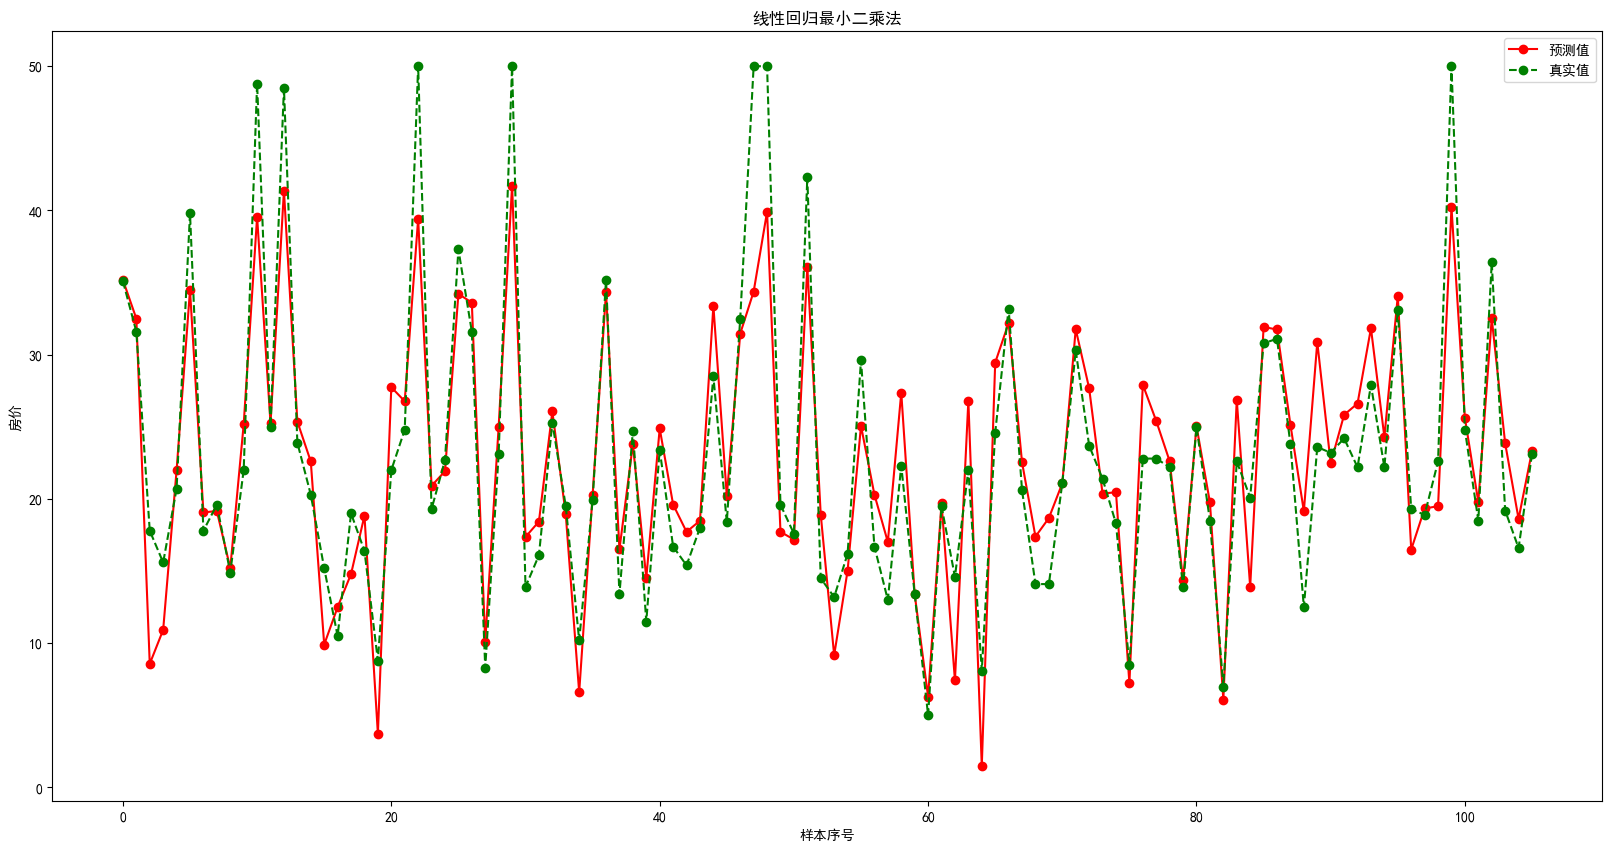

In [38]:
plt.figure(figsize=(20,10))
plt.plot(result, "ro-", label="预测值")
plt.plot(test_y.values, "go--", label="真实值")
plt.xlabel('样本序号')
plt.ylabel('房价')
plt.title('线性回归最小二乘法')
plt.legend(loc='best')
plt.show()